<a href="https://colab.research.google.com/github/Radhe-0/Practicas/blob/main/Machine%20Learning/Red_neuronal_6(clasificacion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red neuronal de clasificación usando SKLearn

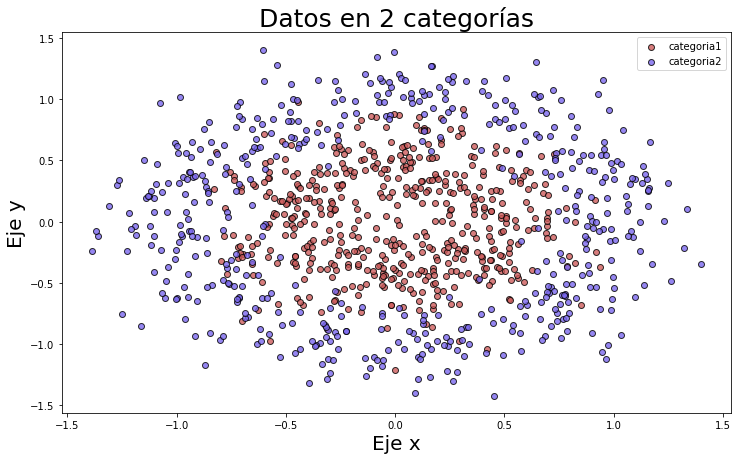

In [93]:
# Cargo los datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

circulos = make_circles(n_samples=1000, factor=0.5,noise=0.2)

df = pd.DataFrame(circulos[0], columns=['X','Y'])
df2 = pd.DataFrame(circulos[1], columns=['categoria'])

datos = pd.concat([df,df2], axis='columns')

centroide = datos[datos['categoria'] == 1]
aro = datos[datos['categoria'] == 0]

# Grafico de los datos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,7))
plt.scatter(centroide['X'],centroide['Y'],color='indianred',label='categoria1', alpha=0.8,
            edgecolors='black')
plt.scatter(aro['X'],aro['Y'],color='mediumslateblue',label='categoria2', alpha=0.8,
            edgecolors='black')
plt.title('Datos en 2 categorías', fontsize=25)
plt.xlabel('Eje x', fontsize=20)
plt.ylabel('Eje y', fontsize=20)
plt.legend()
plt.show()

In [94]:
# Separo los datos en dos grupos: Los de entrenamiento y los de validación
from sklearn.model_selection import train_test_split

X = datos[['X','Y']]
Y = datos['categoria']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [95]:
# Creo el modelo de red neuronal
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(100,100,100),
    activation='relu'
)

# Entrenamiento del modelo
model.fit(xtrain,ytrain)

# Predicciones con los datos de validación
predicciones = model.predict(xtest)

In [96]:
# Precisión del modelo con los datos de validación
model.score(xtest,ytest)

0.904

**La precisión de la red es del 90.4%**

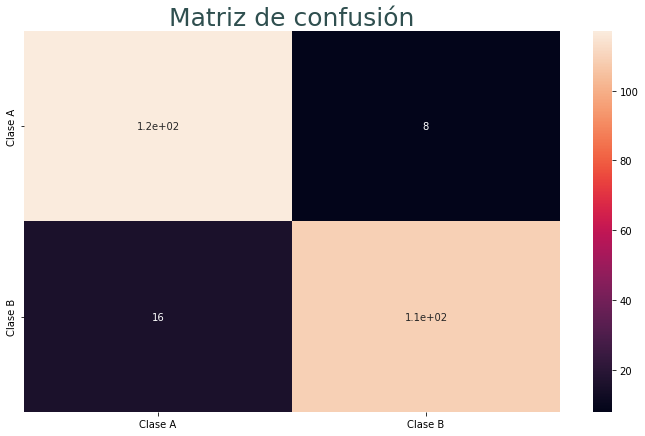

In [97]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

MXC = confusion_matrix(ytest,predicciones)
index_columns = ['Clase A', 'Clase B']
df_MXC = pd.DataFrame(MXC, index=index_columns, columns=index_columns)

fig = plt.figure(figsize=(12,7))
sns.heatmap(df_MXC, annot=True)
plt.title('Matriz de confusión', fontsize=25, color='darkslategray')
plt.show()

### Resumen de la clasificación:

- Datos de la clase A clasificados en la clase A: +120
- Datos de la clase A clasificados en la clase B:  8
- Datos de la clase B clasificados en la clase A: +110
- Datos de la clase B clasificados en la clase B:  16